In [2]:
pip install keras

In [4]:
pip install tensorflow

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.4.1-py3-none-any.whl (93 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join
import re
from sklearn.model_selection import train_test_split
from shutil import copy2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
from sklearn.preprocessing import OneHotEncoder
import warnings
import warnings
warnings.filterwarnings("ignore")

Prepare data for CNNs

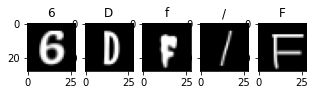

In [23]:
# Read data
df=pd.read_csv('./94_character_TMNIST.csv')
# Set true label for each image
y=df['labels']
# Get image data
X=df.drop(['names','labels'],axis=1)
num_classes=df['labels'].nunique()
# Show some images
plt.figure(figsize=(5, 6))
for i in range(5):  
  plt.subplot(3,5,i+1)
  plt.title(y.iloc[i])
  plt.imshow(X.values[i].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()


In [25]:
# Splitiing the data into test and train
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42,stratify=y)

In [26]:
#the pixel values are from 0-255, for neural network models we are squishing them between 0-1 
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

In [27]:
#encoding the y values using one hot encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded=enc.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded=  enc.transform(y_test.values.reshape(-1,1))

In [28]:
X_train_norm=X_train.values.reshape(X_train.shape[0],28,28)
X_test_norm=X_test.values.reshape(X_test.shape[0],28,28)

Implement CNN model

In [47]:
def buildCNN(cost,opt,acti):
    model = Sequential()
    
    IMAGE_WIDTH = 28
    IMAGE_HEIGHT = 28
    IMAGE_CHANNELS = 1
    
    
    
    model.add(Conv2D(filters=32, kernel_size=(2, 2), activation=acti,
                     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(2, 2), activation=acti))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(2, 2), activation=acti))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation=acti))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=opt, loss=cost, metrics=['accuracy'])

    return model

 I build a classic CNN model with 3 convolution layers each following a max-pooling layer, and end up with a flatten layer and 2 dense also called fully-connected layers. Besides, I use Rectified linear unit (ReLU) as activation function expect the output layer at the end which uses softmax as activation function for classification results. Moreover, the optimizer is Adam which is responsible for the gradient estimation, and the loss (or cost) function is categorical crossentropy function which computes the crossentropy loss between the labels and predictions. There also have a BatchNormalization layer for quicker convergence and a dropout layer to prevent model from overfitting.

Plot results

In [44]:
def plotData(history):
    fig = plt.figure(figsize=(17, 4))
    plt.subplot(121)
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='test_acc')
    plt.legend()
    plt.grid()
    plt.title(f'accuracy')

    plt.subplot(122)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='test_loss')
    plt.legend()
    plt.grid()
    plt.title(f'loss')
    plt.show()

Baseline

In [42]:
opt = 'adam'
cost = 'categorical_crossentropy'
acti = 'relu'
    
model = buildCNN(cost,opt,acti)
history = model.fit(X_train_norm, y_train_encoded, epochs=30, validation_data=(X_test_norm, y_test_encoded))

Epoch 1/30
6425/6425 [==============================] - 124s 19ms/step - loss: 0.7975 - accuracy: 0.7770 - val_loss: 0.3485 - val_accuracy: 0.8922
Epoch 2/30
6425/6425 [==============================] - 120s 19ms/step - loss: 0.4710 - accuracy: 0.8591 - val_loss: 0.2927 - val_accuracy: 0.9111
Epoch 3/30
6425/6425 [==============================] - 120s 19ms/step - loss: 0.4088 - accuracy: 0.8761 - val_loss: 0.2715 - val_accuracy: 0.9156
Epoch 4/30
6425/6425 [==============================] - 121s 19ms/step - loss: 0.3755 - accuracy: 0.8861 - val_loss: 0.2588 - val_accuracy: 0.9198
Epoch 5/30
6425/6425 [==============================] - 121s 19ms/step - loss: 0.3546 - accuracy: 0.8907 - val_loss: 0.2539 - val_accuracy: 0.9206
Epoch 6/30
6425/6425 [==============================] - 121s 19ms/step - loss: 0.3374 - accuracy: 0.8959 - val_loss: 0.2421 - val_accuracy: 0.9241
Epoch 7/30
6425/6425 [==============================] - 122s 19ms/step - loss: 0.3266 - accuracy: 0.8989 - val_loss: 0

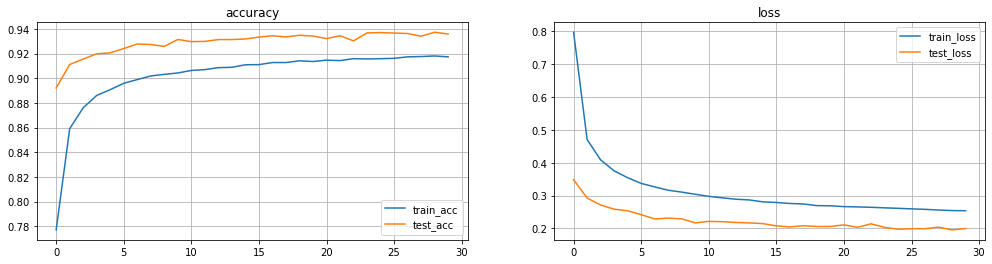

In [45]:
plotData(history)

So we can see that the best accuracy for test is 91.81% at 29th epoch and network plateaus at around 15th epoch.

Activation functions

Change activation function from relu to Exponential linear unit (ELU)

In [49]:
opt = 'adam'
cost = 'categorical_crossentropy'
acti = 'elu'
    
model2 = buildCNN(cost,opt,acti)
history2 = model2.fit(X_train_norm, y_train_encoded, epochs=30, validation_data=(X_test_norm, y_test_encoded))

Epoch 1/30
6425/6425 [==============================] - 148s 23ms/step - loss: 0.7812 - accuracy: 0.7838 - val_loss: 0.3799 - val_accuracy: 0.8809
Epoch 2/30
6425/6425 [==============================] - 147s 23ms/step - loss: 0.4685 - accuracy: 0.8593 - val_loss: 0.2975 - val_accuracy: 0.9084
Epoch 3/30
6425/6425 [==============================] - 148s 23ms/step - loss: 0.4101 - accuracy: 0.8752 - val_loss: 0.3195 - val_accuracy: 0.8945
Epoch 4/30
6425/6425 [==============================] - 144s 22ms/step - loss: 0.3780 - accuracy: 0.8844 - val_loss: 0.2610 - val_accuracy: 0.9183
Epoch 5/30
6425/6425 [==============================] - 139s 22ms/step - loss: 0.3597 - accuracy: 0.8885 - val_loss: 0.2592 - val_accuracy: 0.9186
Epoch 6/30
6425/6425 [==============================] - 139s 22ms/step - loss: 0.3445 - accuracy: 0.8935 - val_loss: 0.2439 - val_accuracy: 0.9229
Epoch 7/30
6425/6425 [==============================] - 140s 22ms/step - loss: 0.3326 - accuracy: 0.8963 - val_loss: 0

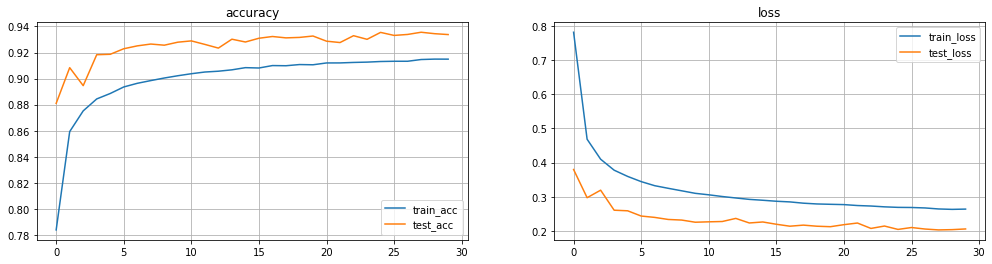

In [50]:
plotData(history2)

So we can see that the best accuracy for test is 91.49% at 29th epoch and network plateaus at around 17th epoch.
As shown above, it decreased the accuracy and slowed network to be plateaus.

COST FUNCTION

Change cost function from categorical crossentropy to Kullback–Leibler divergence.

In [51]:
opt = 'adam'
cost = 'kl_divergence'
acti = 'relu'
    
model3 = buildCNN(cost,opt,acti)
history3 = model3.fit(X_train_norm, y_train_encoded, epochs=30, validation_data=(X_test_norm, y_test_encoded))

Epoch 1/30
6425/6425 [==============================] - 170s 26ms/step - loss: 0.8015 - accuracy: 0.7779 - val_loss: 0.3444 - val_accuracy: 0.8958
Epoch 2/30
6425/6425 [==============================] - 162s 25ms/step - loss: 0.4697 - accuracy: 0.8598 - val_loss: 0.2843 - val_accuracy: 0.9117
Epoch 3/30
6425/6425 [==============================] - 163s 25ms/step - loss: 0.4084 - accuracy: 0.8760 - val_loss: 0.2816 - val_accuracy: 0.9125
Epoch 4/30
6425/6425 [==============================] - 163s 25ms/step - loss: 0.3751 - accuracy: 0.8852 - val_loss: 0.2546 - val_accuracy: 0.9223
Epoch 5/30
6425/6425 [==============================] - 165s 26ms/step - loss: 0.3525 - accuracy: 0.8920 - val_loss: 0.2500 - val_accuracy: 0.9210
Epoch 6/30
6425/6425 [==============================] - 163s 25ms/step - loss: 0.3387 - accuracy: 0.8951 - val_loss: 0.2400 - val_accuracy: 0.9245
Epoch 7/30
6425/6425 [==============================] - 166s 26ms/step - loss: 0.3267 - accuracy: 0.8983 - val_loss: 0

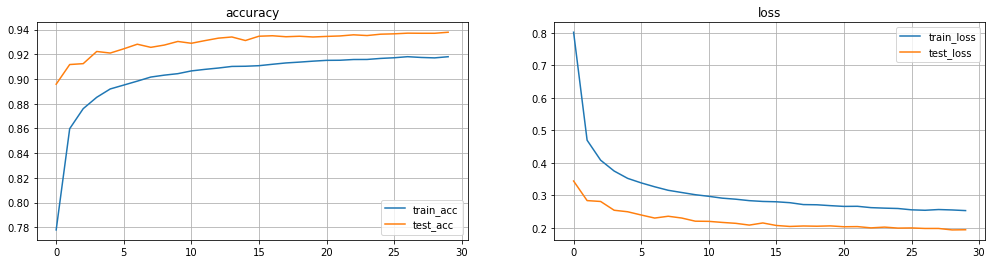

In [52]:
plotData(history3)

So we can see that the best accuracy for test is 91.81% at 29th epoch and network plateaus at around 14th epoch. 
As shown above, it didn't change the accuracy and accelerate network to be plateaus.

EPOCHS

Epoch from 30 to 40

In [53]:
opt = 'adam'
cost = 'categorical_crossentropy'
acti = 'relu'
    
model4 = buildCNN(cost,opt,acti)
history4 = model4.fit(X_train_norm, y_train_encoded, epochs=40, validation_data=(X_test_norm, y_test_encoded))

Epoch 1/40
6425/6425 [==============================] - 183s 28ms/step - loss: 0.8269 - accuracy: 0.7706 - val_loss: 0.3724 - val_accuracy: 0.8884
Epoch 2/40
6425/6425 [==============================] - 174s 27ms/step - loss: 0.4727 - accuracy: 0.8600 - val_loss: 0.3210 - val_accuracy: 0.9018
Epoch 3/40
6425/6425 [==============================] - 176s 27ms/step - loss: 0.4082 - accuracy: 0.8769 - val_loss: 0.2713 - val_accuracy: 0.9142
Epoch 4/40
6425/6425 [==============================] - 178s 28ms/step - loss: 0.3754 - accuracy: 0.8854 - val_loss: 0.2620 - val_accuracy: 0.9203
Epoch 5/40
6425/6425 [==============================] - 178s 28ms/step - loss: 0.3511 - accuracy: 0.8921 - val_loss: 0.2573 - val_accuracy: 0.9202
Epoch 6/40
6425/6425 [==============================] - 179s 28ms/step - loss: 0.3361 - accuracy: 0.8962 - val_loss: 0.2375 - val_accuracy: 0.9254
Epoch 7/40
6425/6425 [==============================] - 180s 28ms/step - loss: 0.3241 - accuracy: 0.8996 - val_loss: 0

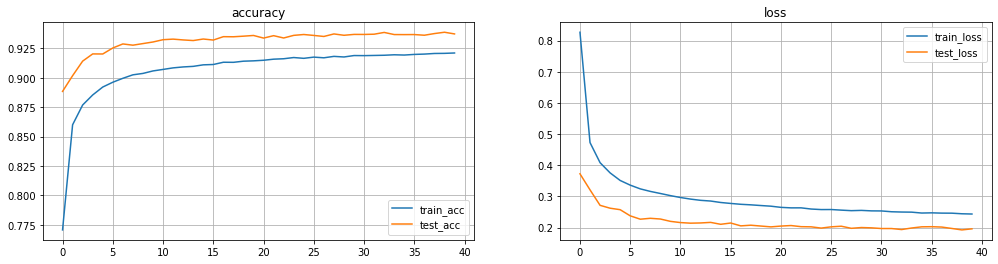

In [54]:
plotData(history4)

So we can see that the best accuracy for test is 92.11% at 40th epoch and network plateaus at around 15th epoch. As shown above, it increased the accuracy and didn't change the network to be plateaus.

GRADIENT ESTIMATION

Change gradient estimation from Adam to RMSprop.

In [56]:
opt = 'RMSprop'
cost = 'categorical_crossentropy'
acti = 'relu'
    
model5 = buildCNN(cost,opt,acti)
history5 = model5.fit(X_train_norm, y_train_encoded, epochs=30, validation_data=(X_test_norm, y_test_encoded))

Epoch 1/30
6425/6425 [==============================] - 199s 31ms/step - loss: 0.8228 - accuracy: 0.7849 - val_loss: 0.4025 - val_accuracy: 0.8969
Epoch 2/30
6425/6425 [==============================] - 221s 34ms/step - loss: 0.5461 - accuracy: 0.8568 - val_loss: 0.3588 - val_accuracy: 0.9013
Epoch 3/30
6425/6425 [==============================] - 220s 34ms/step - loss: 0.5166 - accuracy: 0.8663 - val_loss: 0.3379 - val_accuracy: 0.9085
Epoch 4/30
6425/6425 [==============================] - 216s 34ms/step - loss: 0.5018 - accuracy: 0.8709 - val_loss: 0.3287 - val_accuracy: 0.9120
Epoch 5/30
6425/6425 [==============================] - 215s 33ms/step - loss: 0.4898 - accuracy: 0.8750 - val_loss: 0.3108 - val_accuracy: 0.9156
Epoch 6/30
6425/6425 [==============================] - 216s 34ms/step - loss: 0.4854 - accuracy: 0.8762 - val_loss: 0.3643 - val_accuracy: 0.8978
Epoch 7/30
6425/6425 [==============================] - 201s 31ms/step - loss: 0.4779 - accuracy: 0.8776 - val_loss: 0

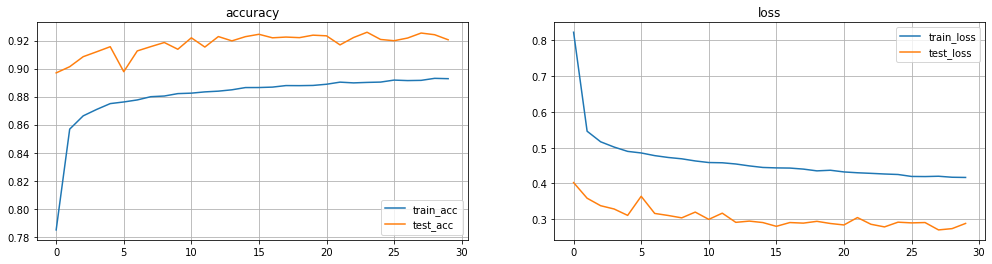

In [57]:
plotData(history5)

So we can see that the best accuracy for test is 89.30% at 29th epoch and network plateaus at around 15th epoch. As shown above, it decreased the accuracy and didn't change the network to be plateaus.

NETWORK ARCHITECTURE

Change network architecture by decreasing convolution layers from 3 to 2.

In [58]:
def buildCNN2(cost,opt,acti):
    model = Sequential()
    
    IMAGE_WIDTH = 28
    IMAGE_HEIGHT = 28
    IMAGE_CHANNELS = 1
    
    
    
    model.add(Conv2D(filters=32, kernel_size=(2, 2), activation=acti,
                     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(2, 2), activation=acti))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation=acti))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=opt, loss=cost, metrics=['accuracy'])
    return model

In [59]:
opt = 'adam'
cost = 'categorical_crossentropy'
acti = 'relu'
    
model6 = buildCNN2(cost,opt,acti)
history6 = model6.fit(X_train_norm, y_train_encoded, epochs=30, validation_data=(X_test_norm, y_test_encoded))

Epoch 1/30
6425/6425 [==============================] - 193s 30ms/step - loss: 0.6906 - accuracy: 0.8146 - val_loss: 0.3107 - val_accuracy: 0.9072
Epoch 2/30
6425/6425 [==============================] - 181s 28ms/step - loss: 0.4184 - accuracy: 0.8786 - val_loss: 0.2766 - val_accuracy: 0.9196
Epoch 3/30
6425/6425 [==============================] - 182s 28ms/step - loss: 0.3764 - accuracy: 0.8907 - val_loss: 0.2569 - val_accuracy: 0.9239
Epoch 4/30
6425/6425 [==============================] - 185s 29ms/step - loss: 0.3517 - accuracy: 0.8954 - val_loss: 0.2408 - val_accuracy: 0.9249
Epoch 5/30
6425/6425 [==============================] - 186s 29ms/step - loss: 0.3370 - accuracy: 0.9002 - val_loss: 0.2323 - val_accuracy: 0.9284
Epoch 6/30
6425/6425 [==============================] - 179s 28ms/step - loss: 0.3239 - accuracy: 0.9036 - val_loss: 0.2300 - val_accuracy: 0.9298
Epoch 7/30
6425/6425 [==============================] - 181s 28ms/step - loss: 0.3142 - accuracy: 0.9050 - val_loss: 0

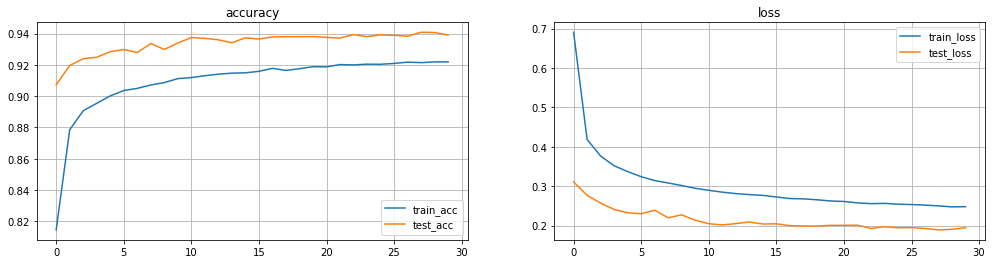

In [60]:
plotData(history6)

So we can see that the best accuracy for test is 92.19% at 29th epoch and network plateaus at around 10th epoch. As shown above, it increased the accuracy and accelerated the network to be plateaus.

NETWORK INITIALIZATION

Change the network initialization to be Uniform.

In [61]:
def buildCNN3(cost,opt,acti):
    model = Sequential()
    
    IMAGE_WIDTH = 28
    IMAGE_HEIGHT = 28
    IMAGE_CHANNELS = 1
    
    
    
    model.add(Conv2D(filters=32, kernel_size=(2, 2), kernel_initializer = 'uniform', activation=acti,
                     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(2, 2), kernel_initializer = 'uniform', activation=acti))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(2, 2), kernel_initializer = 'uniform', activation=acti))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation=acti))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=opt, loss=cost, metrics=['accuracy'])

    return model

In [62]:
opt = 'adam'
cost = 'categorical_crossentropy'
acti = 'relu'
    
model7 = buildCNN3(cost,opt,acti)
history7 = model7.fit(X_train_norm, y_train_encoded, epochs=30, validation_data=(X_test_norm, y_test_encoded))

Epoch 1/30
6425/6425 [==============================] - 262s 41ms/step - loss: 0.8047 - accuracy: 0.7769 - val_loss: 0.4916 - val_accuracy: 0.8534
Epoch 2/30
6425/6425 [==============================] - 253s 39ms/step - loss: 0.4785 - accuracy: 0.8563 - val_loss: 0.3067 - val_accuracy: 0.9066
Epoch 3/30
6425/6425 [==============================] - 251s 39ms/step - loss: 0.4145 - accuracy: 0.8745 - val_loss: 0.2921 - val_accuracy: 0.9086
Epoch 4/30
6425/6425 [==============================] - 249s 39ms/step - loss: 0.3792 - accuracy: 0.8837 - val_loss: 0.2634 - val_accuracy: 0.9184
Epoch 5/30
6425/6425 [==============================] - 260s 41ms/step - loss: 0.3584 - accuracy: 0.8902 - val_loss: 0.2546 - val_accuracy: 0.9215
Epoch 6/30
6425/6425 [==============================] - 254s 40ms/step - loss: 0.3417 - accuracy: 0.8947 - val_loss: 0.2501 - val_accuracy: 0.9228
Epoch 7/30
6425/6425 [==============================] - 256s 40ms/step - loss: 0.3300 - accuracy: 0.8984 - val_loss: 0

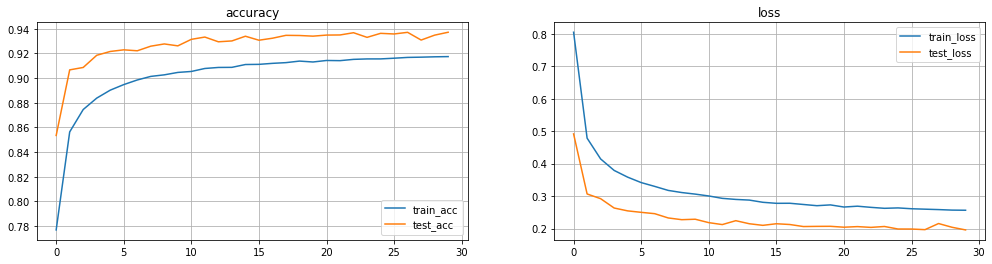

In [63]:
plotData(history7)

So we can see that the best accuracy for test is 91.74% at 30th epoch and network plateaus at around 20th epoch. As shown above, it decreased the accuracy and slowed the network to be plateaus.

Reference

https://www.kaggle.com/code/nikbearbrown/tmnist-cnn-starter

https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters

License
Copyright 2022 Yiyun Chen

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.